## Deep Learning workflow with Keras
In this jupyter notebook, we will apply NN for a classification task and a regression task. Specifically, we will follow the same workflow for each task:

- define the training data: input and target tensors (X, Y)
- build a model that maps your inputs to targets
  - building sequential layers or flexible architectures with functional API
  - visualize model architecture
- configure the training process
  - loss function, optimizer, evaluation metrics
- Train the model (fit)   
  - moniter loss and accuracy on validation data
  - understand how well the model is trained (underfitting VS overfitting)

In [13]:
import numpy as np
import pandas as pd

import keras
from keras import models, layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

### NN for a binary classification task

We will use the sonar [dataset](https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks) to train a binary classifier that discriminates between sonar signals bounced off a metal cylinder and signals bounced off a roughly cylindrical rock. There are 208 samples and each sample is represented by 60 features indicating the strength of the returns at different angles.


In [2]:
# load the data
from google.colab import drive
drive.mount('/content/drive')

# please change the following path to your data path
dataframe = pd.read_csv("/content/drive/MyDrive/DLP/sonar.csv", header=None)
dataset = dataframe.values

Mounted at /content/drive


**Define the training data**

In [3]:
# prepare data for model training
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# split data into train/test/validation
X_data, X_test, y_data, y_test = train_test_split(X, encoded_Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, X_val.shape

((132, 60), (42, 60), (34, 60))

**Create a NN model**

In [4]:
# Define a NN
clf_model = Sequential()
clf_model.add(Dense(60, input_shape=(60,), activation='relu'))
clf_model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                896       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


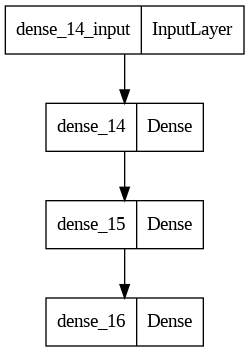

In [26]:
keras.utils.plot_model(model, "binary_classifier.png") # show_shapes=True

**Configure the training process**

In [5]:
clf_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train the model**

In [6]:
history = clf_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
5/5 [==============================] - 1s 62ms/step - loss: 0.7131 - accuracy: 0.4773 - val_loss: 0.6681 - val_accuracy: 0.5588
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6762 - accuracy: 0.6364 - val_loss: 0.6586 - val_accuracy: 0.6765
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.6624 - accuracy: 0.5985 - val_loss: 0.6544 - val_accuracy: 0.6765
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.6470 - accuracy: 0.6212 - val_loss: 0.6439 - val_accuracy: 0.7059
Epoch 5/100
5/5 [==============================] - 0s 23ms/step - loss: 0.6375 - accuracy: 0.6818 - val_loss: 0.6346 - val_accuracy: 0.6765
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 0.6306 - accuracy: 0.6970 - val_loss: 0.6266 - val_accuracy: 0.6471
Epoch 7/100
5/5 [==============================] - 0s 22ms/step - loss: 0.6247 - accuracy: 0.7273 - val_loss: 0.6205 - val_accuracy: 0.6765
Epoch 8/100
5/5 [===

**Visualize model performance during the training process**

In [7]:
def visualize_performance(flag):
  history_dict = history.history
  epochs = range(1, len(history_dict["loss"]) + 1)

  plt.plot(epochs, history_dict[flag], "bo", label="Training "+flag)
  plt.plot(epochs, history_dict["val_"+flag], "b", label="Validation "+flag)
  plt.title("Training and validation "+flag)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

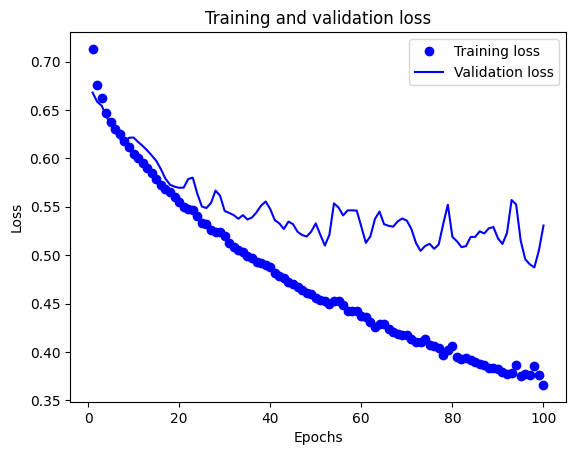

In [8]:
visualize_performance(flag = "loss")

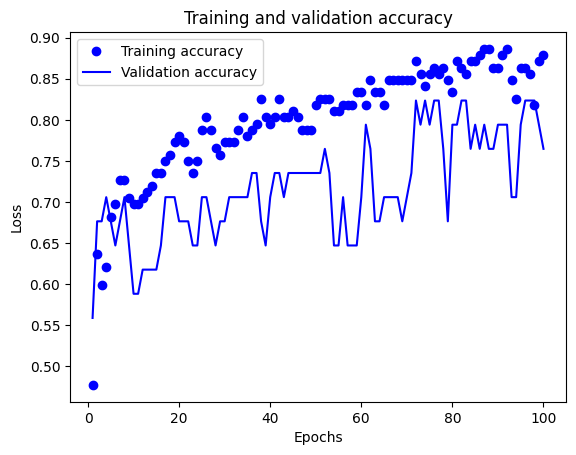

In [9]:
visualize_performance(flag = "accuracy")

**Evaluate model performance**

In [10]:
# evaluate model performance regarding accuracy
test_loss, test_acc = clf_model.evaluate(X_test, y_test)
print(f"test_acc: {np.round(test_acc,3)}")

2/2 [==============================] - 0s 21ms/step - loss: 0.3264 - accuracy: 0.9048
test_acc: 0.905


In [14]:
# inference
y_pred_prob = clf_model.predict(X_test)
y_pred_labels = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

2/2 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.93      0.81      0.87        16

    accuracy                           0.90        42
   macro avg       0.91      0.89      0.90        42
weighted avg       0.91      0.90      0.90        42



### NN for a regression task
In this task, we’ll train a regression model to predict the median price of homes in a given Boston suburb in the mid-1970s. The [dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) has 506 samples with 404 for training  and 102 for testing, and each feature has a different scale.



**Define the training data**

In [15]:
# loading the dataset
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
    boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [16]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [17]:
## Prepare the data
# normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

**Create a NN model and configure the training process**

In [18]:
# build the model
def build_model():
    rg_model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    # notice the different configuration compare with classification tasks
    # use mse, mae as loss and evaluation metric in regressin task
    rg_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return rg_model

**Perform K-fold cross validation**

In [20]:
# 4-fold cross validation
num_epochs = 500
k = 4
num_val_samples = len(train_data) // k
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
                                       [train_data[:i * num_val_samples],
                                       train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
                                          [train_targets[:i * num_val_samples],
                                          train_targets[(i + 1) * num_val_samples:]],axis=0)
    # build and train the model for each fold
    rg_model = build_model()
    history = rg_model.fit(partial_train_data, partial_train_targets,
                           validation_data=(val_data, val_targets),
                          epochs=num_epochs, batch_size=16, verbose=0)

    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Visualize model performance during the training process**

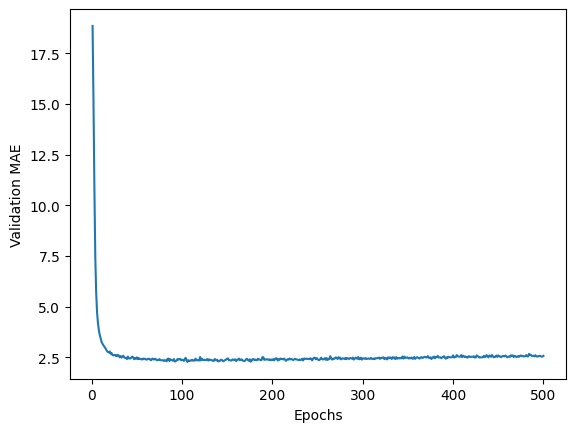

In [21]:
# plot validation loss
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

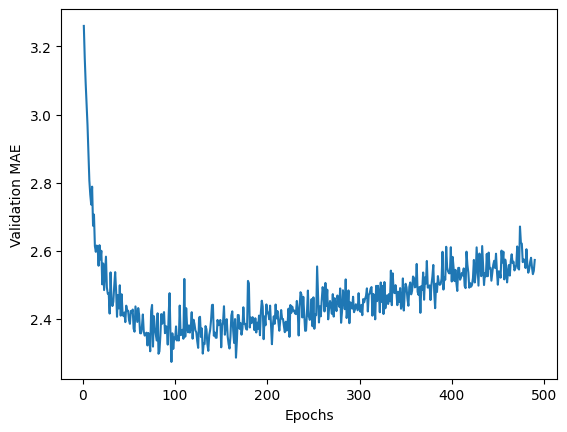

In [22]:
# plot validation loss, excluding the first 10 data points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Re-train the final model with all of the training data**

In [23]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 14.1156 - mae: 2.4427


**Making prediction for test data**

In [24]:
predictions = model.predict(test_data)
predictions[:10]

4/4 [==============================] - 0s 8ms/step


array([[ 6.4081273],
       [18.416222 ],
       [22.053444 ],
       [34.04367  ],
       [25.131975 ],
       [22.879807 ],
       [28.964344 ],
       [21.913502 ],
       [18.630054 ],
       [21.461613 ]], dtype=float32)